In [164]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [165]:
df = pd.read_csv('first_batch_salad_data.csv')


In [166]:
df.head()


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,73,MAIN,2023-04-18 15:53:41.574135,39.967,2023-04-18 15:45:00.000000,55,0.0,25,14.0,3.0,1025.0
1,74,MAIN,2023-04-18 15:58:43.051105,40.083,2023-04-18 15:45:00.000000,55,0.0,25,14.0,3.0,1025.0
2,75,MAIN,2023-04-18 16:03:44.586642,40.167,2023-04-18 16:00:00.000000,55,0.0,0,14.0,4.0,1025.0
3,76,MAIN,2023-04-18 16:08:46.053279,40.133,2023-04-18 16:00:00.000000,55,0.0,25,14.0,4.0,1025.0
4,77,MAIN,2023-04-18 16:13:47.546052,48.117,2023-04-18 16:00:00.000000,55,0.0,25,14.0,4.0,1025.0


In [167]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   measurement_id         6043 non-null   int64  
 1   sensor                 6043 non-null   object 
 2   measured_at            6043 non-null   object 
 3   humdity                6043 non-null   float64
 4   weather_measured_at    6043 non-null   object 
 5   weather_himidity       6043 non-null   int64  
 6   weather_precipitation  6043 non-null   float64
 7   weather_cloud          6043 non-null   int64  
 8   weather_temperature    6043 non-null   float64
 9   weather_uv_index       6043 non-null   float64
 10  weather_pressure       6043 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 519.4+ KB


In [168]:
df.describe()


,measurement_id,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
count,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000
mean,3098.372828,53.219127,74.365547,0.195400,43.815820,12.571620,2.719345,1015.851398
std,1747.451966,19.618362,18.389203,0.588114,39.057042,4.374862,1.597955,6.096224
min,73.000000,24.760000,27.000000,0.000000,0.000000,-1.000000,1.000000,1000.000000
25%,1583.500000,38.033000,60.000000,0.000000,0.000000,10.000000,1.000000,1013.000000
50%,3101.000000,42.310000,76.000000,0.000000,37.000000,13.000000,3.000000,1016.000000
75%,4611.500000,70.155000,93.000000,0.100000,75.000000,15.000000,4.000000,1019.000000
max,6122.000000,89.600000,100.000000,4.900000,100.000000,23.000000,6.000000,1028.000000


In [169]:
df['measured_at'] = df['measured_at'].apply(lambda x: str(x).split('.')[0])
df['measured_at'] = pd.to_datetime(df['measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['weather_measured_at'] = df['weather_measured_at'].apply(lambda x: str(x).split('.')[0])
df['weather_measured_at'] = pd.to_datetime(df['weather_measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [170]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   measurement_id         6043 non-null   int64         
 1   sensor                 6043 non-null   object        
 2   measured_at            6043 non-null   datetime64[ns]
 3   humdity                6043 non-null   float64       
 4   weather_measured_at    6043 non-null   datetime64[ns]
 5   weather_himidity       6043 non-null   int64         
 6   weather_precipitation  6043 non-null   float64       
 7   weather_cloud          6043 non-null   int64         
 8   weather_temperature    6043 non-null   float64       
 9   weather_uv_index       6043 non-null   float64       
 10  weather_pressure       6043 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(1)
memory usage: 519.4+ KB


In [171]:
df.head()


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,73,MAIN,2023-04-18 15:53:41,39.967,2023-04-18 15:45:00,55,0.0,25,14.0,3.0,1025.0
1,74,MAIN,2023-04-18 15:58:43,40.083,2023-04-18 15:45:00,55,0.0,25,14.0,3.0,1025.0
2,75,MAIN,2023-04-18 16:03:44,40.167,2023-04-18 16:00:00,55,0.0,0,14.0,4.0,1025.0
3,76,MAIN,2023-04-18 16:08:46,40.133,2023-04-18 16:00:00,55,0.0,25,14.0,4.0,1025.0
4,77,MAIN,2023-04-18 16:13:47,48.117,2023-04-18 16:00:00,55,0.0,25,14.0,4.0,1025.0


In [172]:
df[df.isna().any(axis=1)]


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure


In [173]:
df.drop(columns=["weather_measured_at", "measurement_id"], inplace=True)

In [174]:
df['humidity_change'] = df['humdity'].pct_change()


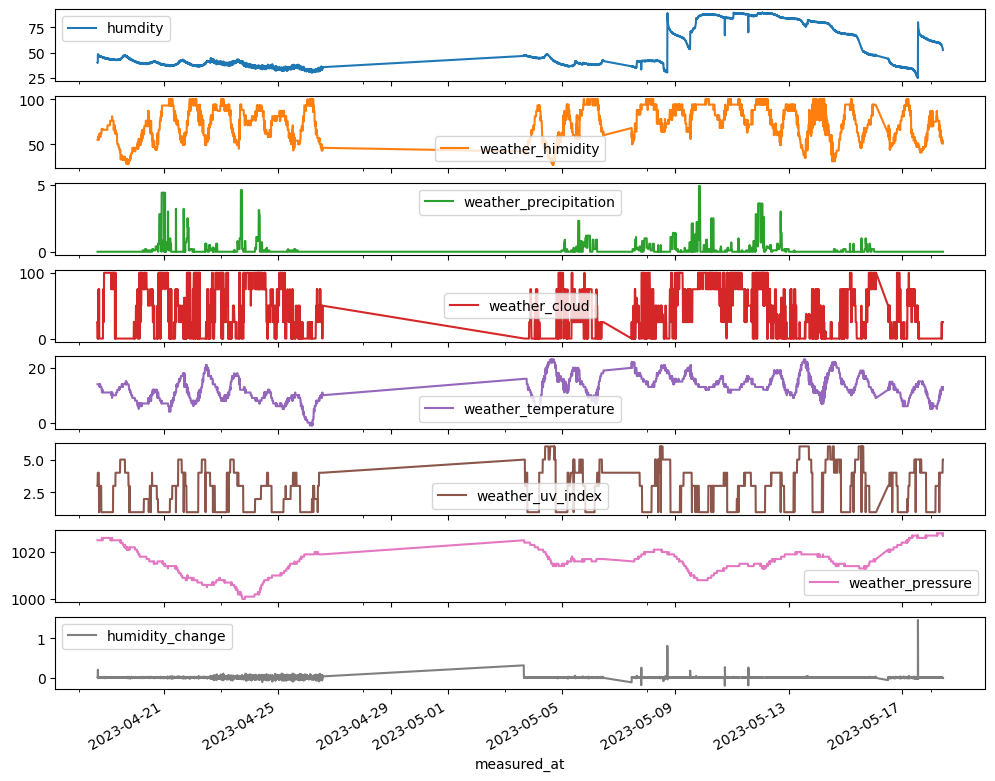

In [175]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10));


In [176]:
# Print df where humidity_change is is greater than 0.1 AND weather_precipitation is less than 0.1
df[(df['humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0)]


,sensor,measured_at,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
4,MAIN,2023-04-18 16:13:47,48.117,55,0.0,25,14.0,4.0,1025.0,0.198939
2268,MAIN,2023-05-03 16:04:03,46.620,42,0.0,0,16.0,5.0,1025.0,0.310176
3142,MAIN,2023-05-07 19:27:06,41.570,88,0.0,0,17.0,3.0,1019.0,0.251355
3404,MAIN,2023-05-08 17:25:00,54.810,73,0.0,0,19.0,5.0,1019.0,0.810106
3405,MAIN,2023-05-08 17:30:02,88.860,73,0.0,0,19.0,5.0,1019.0,0.621237
4215,MAIN,2023-05-11 13:55:43,87.660,68,0.0,50,17.0,4.0,1014.0,0.254257
5790,MAIN,2023-05-17 13:10:38,61.130,47,0.0,25,13.0,5.0,1027.0,1.468901
5791,MAIN,2023-05-17 13:15:40,79.910,47,0.0,25,13.0,5.0,1027.0,0.307214


In [177]:
# Set humidity_change to 0 where humidity_change is greater than 0.1 AND weather_precipitation is less than 0.1
df.loc[(df['humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0), 'humidity_change'] = 0
# df.loc[(df['humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0), 'humidity_change'] = df['humidity_change'].mean()


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

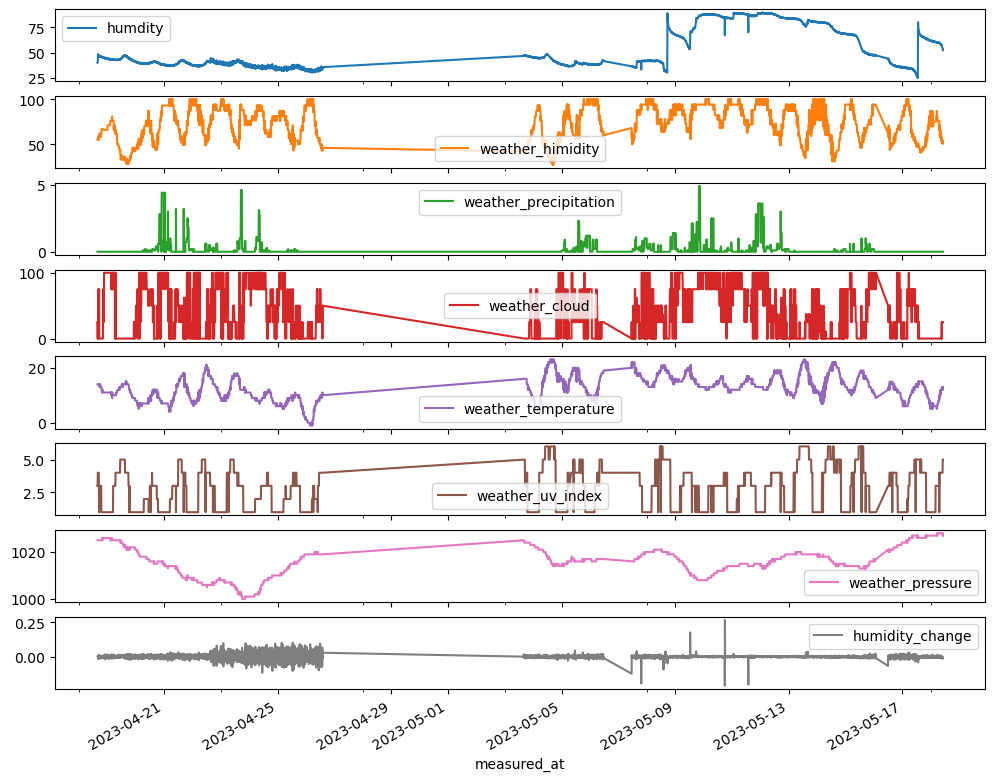

In [178]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


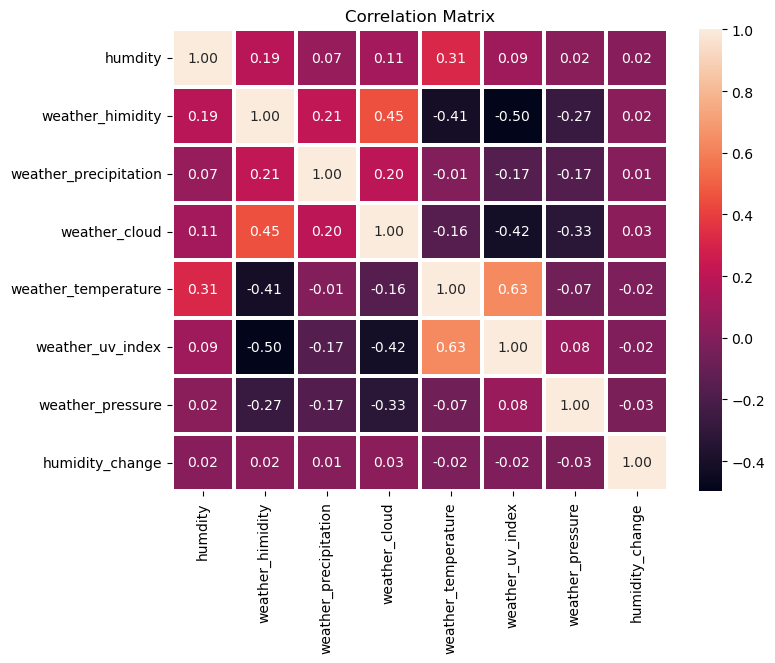

In [179]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [180]:
df.describe()

,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
count,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6042.000000
mean,53.219127,74.365547,0.195400,43.815820,12.571620,2.719345,1015.851398,-0.000322
std,19.618362,18.389203,0.588114,39.057042,4.374862,1.597955,6.096224,0.017557
min,24.760000,27.000000,0.000000,0.000000,-1.000000,1.000000,1000.000000,-0.211964
25%,38.033000,60.000000,0.000000,0.000000,10.000000,1.000000,1013.000000,-0.004980
50%,42.310000,76.000000,0.000000,37.000000,13.000000,3.000000,1016.000000,-0.000378
75%,70.155000,93.000000,0.100000,75.000000,15.000000,4.000000,1019.000000,0.004046
max,89.600000,100.000000,4.900000,100.000000,23.000000,6.000000,1028.000000,0.266288


In [191]:
thresh = 0.1
df.loc[(df["humidity_change"] < -thresh), "humidity_change"] = 0

In [192]:
df.describe()

,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
count,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6042.000000
mean,53.219127,74.365547,0.195400,43.815820,12.571620,2.719345,1015.851398,-0.000146
std,19.618362,18.389203,0.588114,39.057042,4.374862,1.597955,6.096224,0.016714
min,24.760000,27.000000,0.000000,0.000000,-1.000000,1.000000,1000.000000,-0.099090
25%,38.033000,60.000000,0.000000,0.000000,10.000000,1.000000,1013.000000,-0.004958
50%,42.310000,76.000000,0.000000,37.000000,13.000000,3.000000,1016.000000,-0.000354
75%,70.155000,93.000000,0.100000,75.000000,15.000000,4.000000,1019.000000,0.004046
max,89.600000,100.000000,4.900000,100.000000,23.000000,6.000000,1028.000000,0.266288


In [183]:
hourly = df.groupby(pd.Grouper(key='measured_at', freq='H')).mean(numeric_only=True)
hourly.reset_index(inplace=True)

In [184]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   measured_at            716 non-null    datetime64[ns]
 1   humdity                515 non-null    float64       
 2   weather_himidity       515 non-null    float64       
 3   weather_precipitation  515 non-null    float64       
 4   weather_cloud          515 non-null    float64       
 5   weather_temperature    515 non-null    float64       
 6   weather_uv_index       515 non-null    float64       
 7   weather_pressure       515 non-null    float64       
 8   humidity_change        515 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 50.5 KB


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

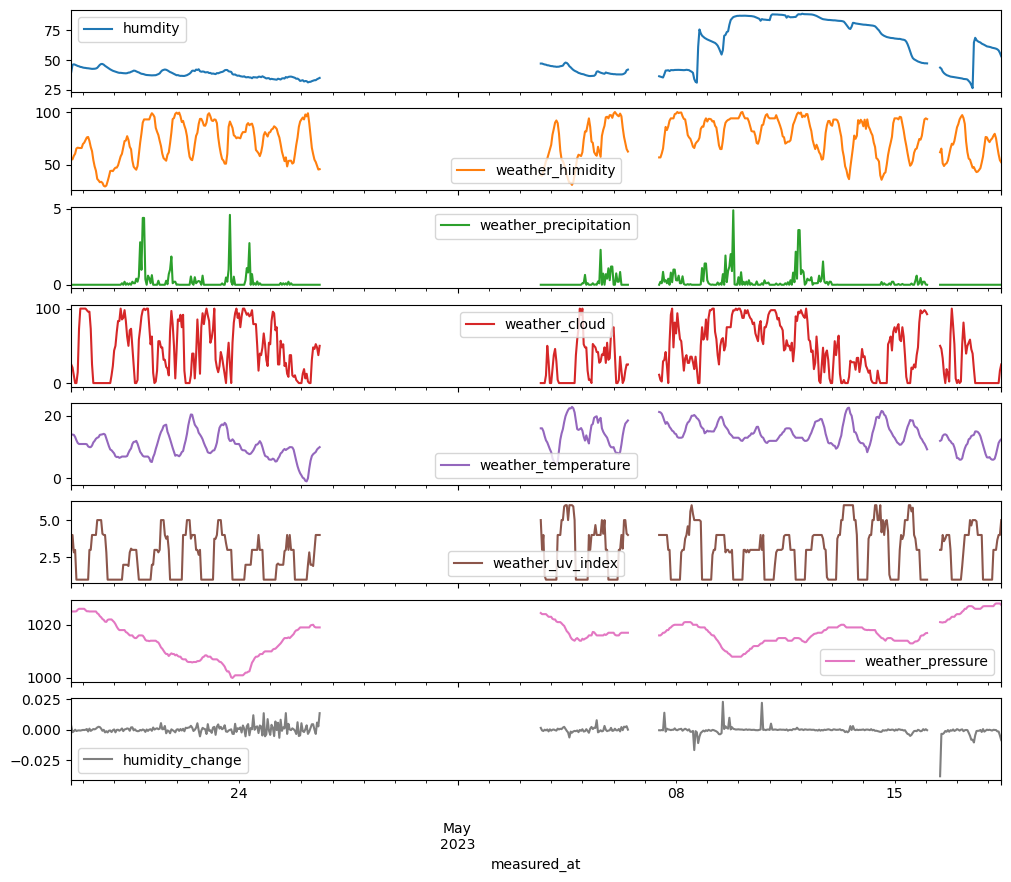

In [185]:
hourly.plot(x='measured_at', subplots=True, figsize=(12, 10))